In [1]:
from google.colab import files
files.upload()

Saving wine_quality_processed.csv to wine_quality_processed.csv


{'wine_quality_processed.csv': b'wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label\r\n1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,1\r\n1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,1\r\n1,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,1\r\n1,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,1\r\n1,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,1\r\n1,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,1\r\n1,8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12,0\r\n1,8.6,0.23,0.4,4.2,0.035,17,109,0.9947,3.14,0.53,9.7,0\r\n1,7.9,0.18,0.37,1.2,0.04,16,75,0.992,3.18,0.63,10.8,0\r\n1,6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4,1\r\n1,8.3,0.42,0.62,19.25,0.04,41,172,1.0002,2.98,0.67,9.7,0\r\n1,6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4,1\r\n1,6.3,0.48,0.04,1.1,0.046,30,99,0.9928,3.24,0.36,9.6,1\r\n1,6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.

In [2]:
!ls


sample_data  wine_quality_processed.csv


In [3]:
import pandas as pd

df = pd.read_csv("wine_quality_processed.csv")
df.head()



,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             5320 non-null   int64  
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality_label         5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


In [5]:
X = df.drop('quality_label', axis=1)
y = df['quality_label']



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

from sklearn.metrics import accuracy_score, classification_report


Accuracy: 0.7528195488721805
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       398
           1       0.78      0.83      0.81       666

    accuracy                           0.75      1064
   macro avg       0.74      0.73      0.73      1064
weighted avg       0.75      0.75      0.75      1064



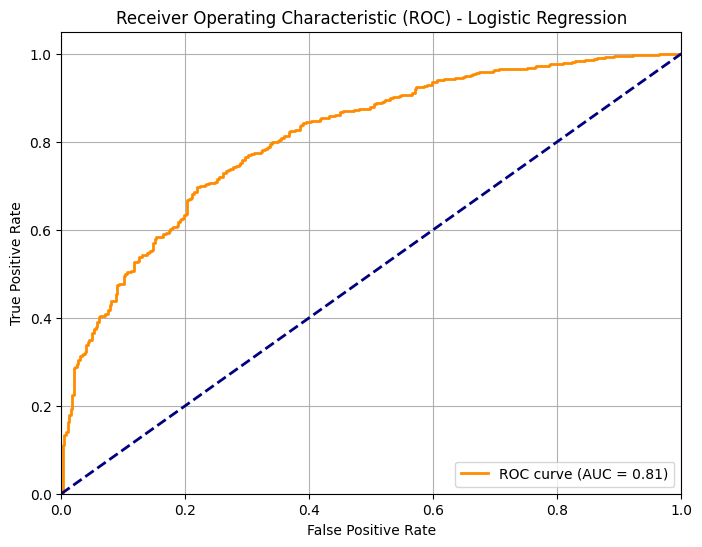

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("logistic_regression_results.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


Accuracy: 0.6907894736842105
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       398
           1       0.76      0.75      0.75       666

    accuracy                           0.69      1064
   macro avg       0.67      0.67      0.67      1064
weighted avg       0.69      0.69      0.69      1064



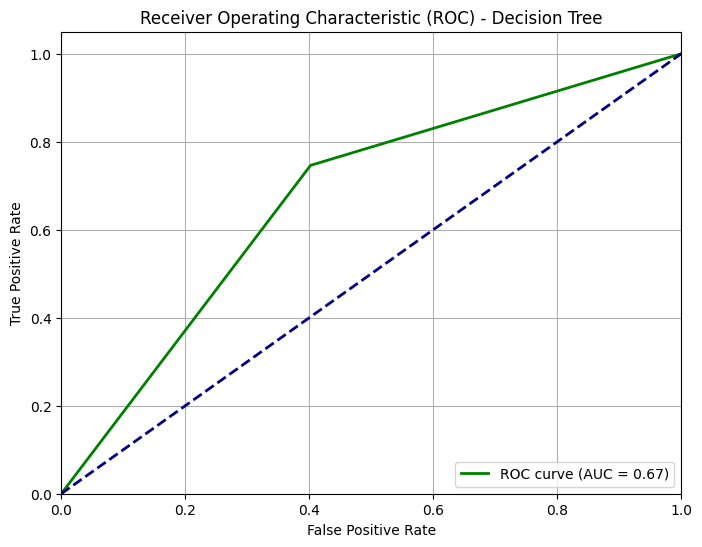

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


y_prob_dt = dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("decision_tree_results_d2.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


Accuracy: 0.7744360902255639
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       398
           1       0.80      0.85      0.83       666

    accuracy                           0.77      1064
   macro avg       0.76      0.75      0.75      1064
weighted avg       0.77      0.77      0.77      1064



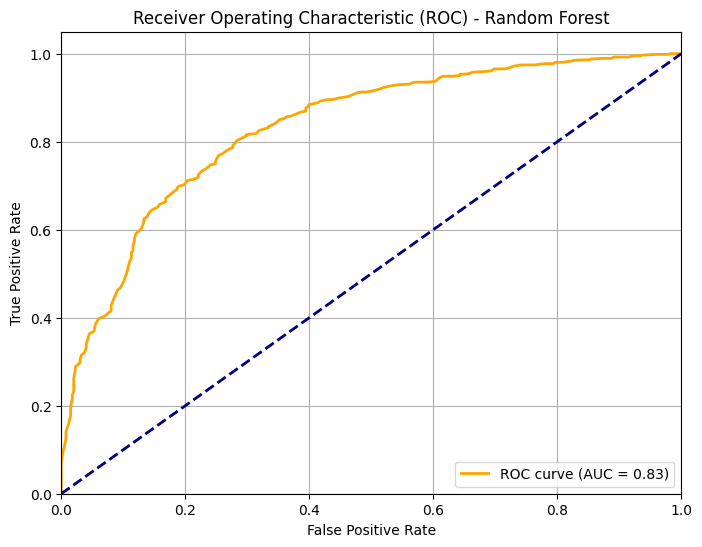

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("random_forest_results_d2.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


Accuracy: 0.7255639097744361
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       398
           1       0.76      0.81      0.79       666

    accuracy                           0.73      1064
   macro avg       0.71      0.70      0.70      1064
weighted avg       0.72      0.73      0.72      1064



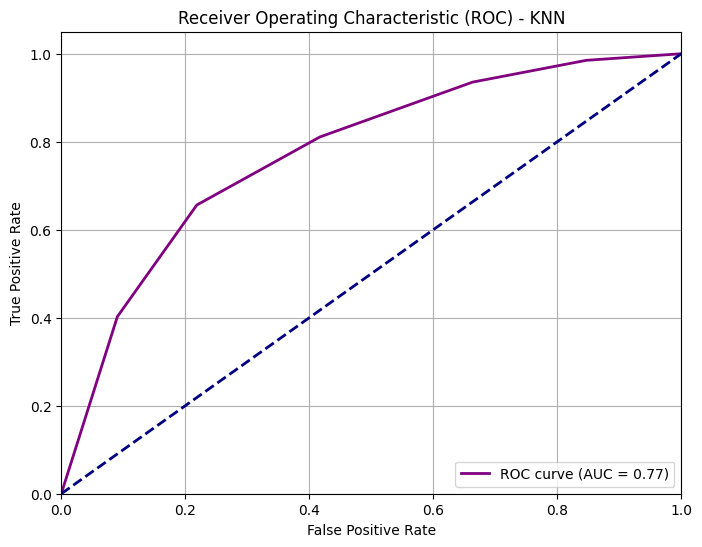

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("knn_results_d2.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00
Accuracy: 0.7669172932330827
              precision    recall  f1-score   support

           0       0.71      0.65      0.67       398
           1       0.80      0.84      0.82       666

    accuracy                           0.77      1064
   macro avg       0.75      0.74      0.75      1064
weighted avg       0.76      0.77      0.76      1064



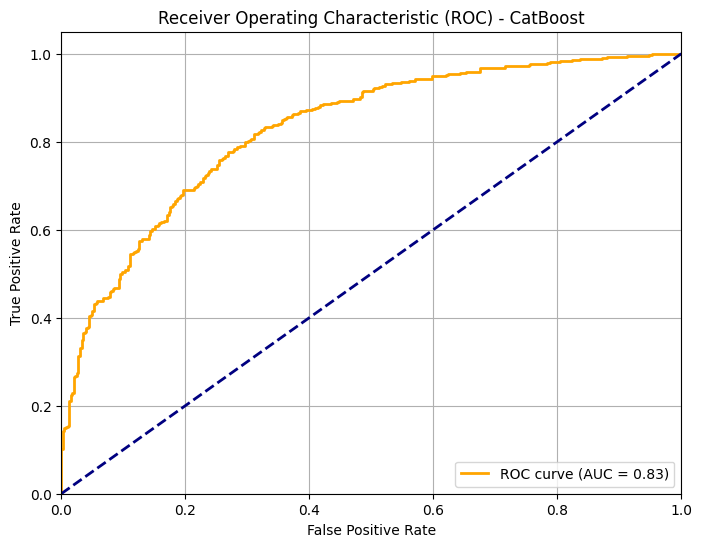

In [13]:
!pip install catboost

import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)


y_prob_cat = cat.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_cat)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_cat)
class_report = classification_report(y_test, y_pred_cat, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_cat))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("catboost_results.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7556390977443609
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       398
           1       0.80      0.82      0.81       666

    accuracy                           0.76      1064
   macro avg       0.74      0.73      0.74      1064
weighted avg       0.75      0.76      0.75      1064



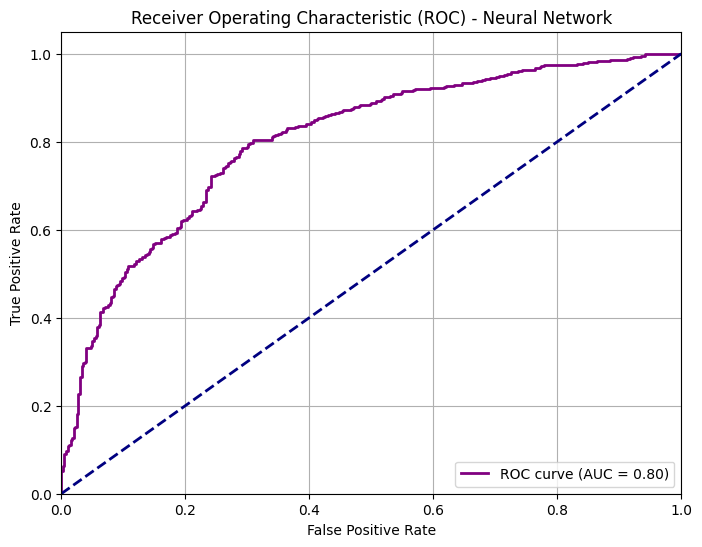

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd


mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)


y_pred_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_mlp)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_mlp)
class_report = classification_report(y_test, y_pred_mlp, output_dict=True)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_mlp))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

accuracy_df = pd.DataFrame({"Accuracy": [accuracy]})

classification_df = pd.DataFrame(class_report).transpose()

min_len = min(len(fpr), len(tpr), len(thresholds))
roc_df = pd.DataFrame({
    "False Positive Rate": fpr[:min_len],
    "True Positive Rate": tpr[:min_len],
    "Threshold": thresholds[:min_len]
})

with pd.ExcelWriter("neural_network_results_d2.xlsx", engine="openpyxl") as writer:
    accuracy_df.to_excel(writer, sheet_name="Accuracy", index=False)
    classification_df.to_excel(writer, sheet_name="Classification_Report")
    roc_df.to_excel(writer, sheet_name="ROC_Data", index=False)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("wine_quality_processed.csv")

sns.set(style="whitegrid")


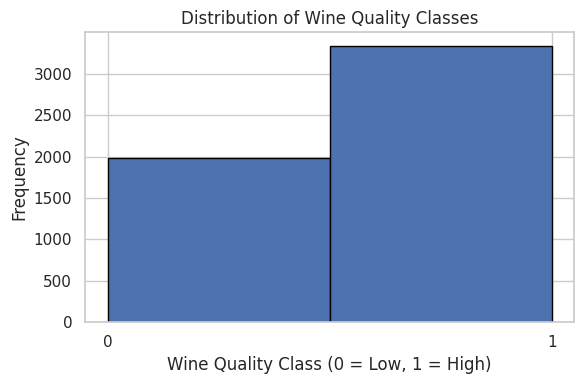

In [19]:
plt.figure(figsize=(6, 4))

plt.hist(
    df["quality_label"],
    bins=2,
    edgecolor="black"
)

plt.xlabel("Wine Quality Class (0 = Low, 1 = High)")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quality Classes")

plt.xticks([0, 1])
plt.tight_layout()
plt.show()


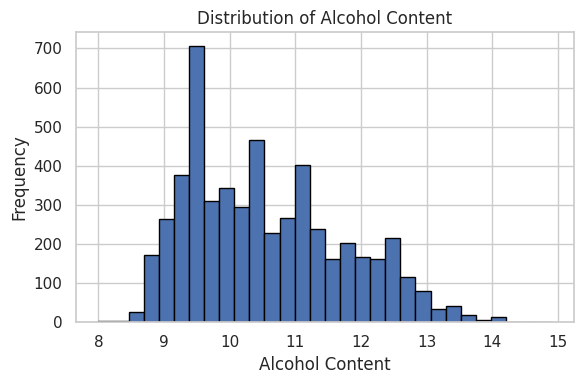

In [27]:
plt.figure(figsize=(6, 4))

plt.hist(
    df["alcohol"],
    bins=30,
    edgecolor="black"
)

plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol Content")

plt.tight_layout()
plt.show()


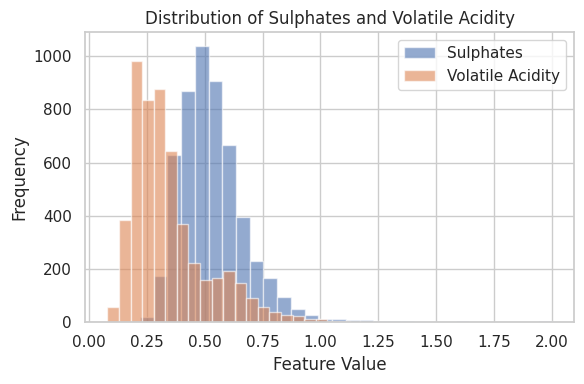

In [28]:
plt.figure(figsize=(6, 4))

plt.hist(
    df["sulphates"],
    bins=30,
    alpha=0.6,
    label="Sulphates"
)

plt.hist(
    df["volatile acidity"],
    bins=30,
    alpha=0.6,
    label="Volatile Acidity"
)

plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Distribution of Sulphates and Volatile Acidity")

plt.legend()
plt.tight_layout()
plt.show()


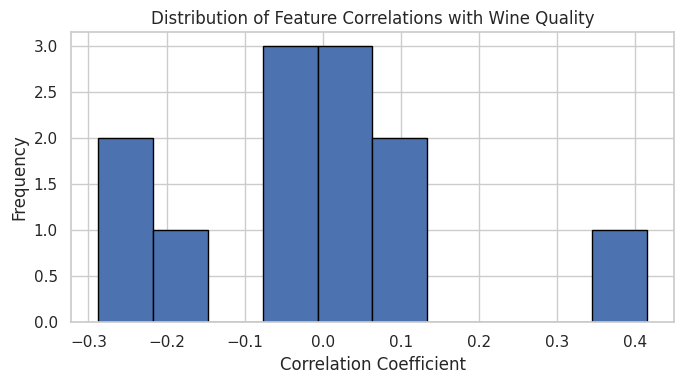

In [21]:
corr_matrix = df.corr()

quality_corr = corr_matrix["quality_label"].drop("quality_label")

plt.figure(figsize=(7, 4))

plt.hist(
    quality_corr,
    bins=10,
    edgecolor="black"
)

plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Correlations with Wine Quality")

plt.tight_layout()
plt.show()
